<a href="https://colab.research.google.com/github/jakerg1/Planet-Nine/blob/main/PlanetX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Enter the distance of Planet X from the Sun in AU (between 100 - 150): 115
V band magnitude 20.937645612600882
g band magnitude 21.037645612600883

Planet X Candidates:
                     objID        ra       dec         u         g         r  \
12396  1237657363222430095  0.147325  0.219734  21.47294  21.03674  20.39243   
17668  1237663784197488959  0.210774  0.160066     22.07  21.03794  20.58822   
20735  1237666661841764935  0.242684  0.396299  21.72855  21.03864  20.28836   
30615  1237646012157067480  0.355297  0.473433  21.99782  21.03857  20.56522   
30629  1237659906395013307  0.355344  0.473451  21.87766  21.03669  20.63445   
33726  1237659905858208123  0.398830  0.005864  26.32734  21.03685  20.38890   
35912  1237663462074679587  0.423866  0.405014  21.72684  21.03711  20.48302   

           g_r  
12396  0.64431  
17668  0.44972  
20735  0.7

<ipython-input-7-94ad2e8896d5>:55: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(highlight_data['ra'], highlight_data['dec'], c='black', edgecolor='black', s=(25 - highlight_data['g']) * 10, alpha=1.0, marker='x', label=f'Objects with g ≈ {planet_x_magnitude}')


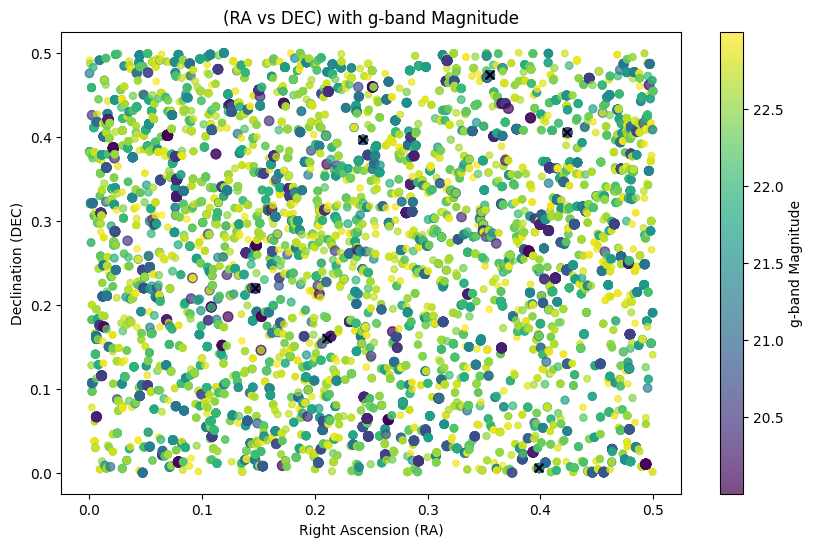

In [ ]:

# import data
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/planet_x_data50000.csv', skiprows=1, names=['objID', 'ra', 'dec', 'u', 'g', 'r', 'i','z'])

# convert columns to numeric and handle errors
data['ra'] = pd.to_numeric(data['ra'], errors='coerce')
data['dec'] = pd.to_numeric(data['dec'], errors='coerce')
data['g'] = pd.to_numeric(data['g'], errors='coerce')
data['r'] = pd.to_numeric(data['r'], errors='coerce')

# find and sort by g-r color index
data['g_r'] = data['g'] - data['r']
data = data[(data['g_r'] >= 0.4) & (data['g_r'] <= 0.8)]

#print("Filtered Data:")
#print(data)


V_Nep = 7.8 # Magnitude of neptune
R_X = 4  # Radius of Planet X in Earth Radii
R_Nep = 3.86  # Radius of Neptune in Earth Radii
A_X = 0.75  # Albedo of Planet X
A_Nep = 0.41  # Albedo of Neptune
r_Nep = 30
r_X = float(input("Enter the distance of Planet X from the Sun in AU (between 100 - 150): "))

# Equation for V band magnitude of Venus and g_band conversion
V_X = V_Nep + 5 * np.log10(((R_X / R_Nep)**2) * (A_X / A_Nep) * (r_X / r_Nep)**4)
g_band = V_X + 0.1

planet_x_magnitude = g_band

# magnitude tolerance for planet 9 candidates
tolerance = 0.001

print("V band magnitude", V_X)
print("g band magnitude", g_band)

# filter planet 9 candidates based on magnitude
if g_band < 20:
    print("Too close: Planet X is probably not within 100 AU")
elif g_band > 23:
    print("Too far: SDSS is not sensitive enough to detect this magnitude.")

else:
    planet_x_candidates = data[(data['g'] >= g_band - tolerance) & (data['g'] <= g_band + tolerance)]
    highlight_data = data[(data['g'] >= planet_x_magnitude - tolerance) & (data['g'] <= planet_x_magnitude + tolerance)]

    print("\nPlanet X Candidates:")
    print(planet_x_candidates[['objID', 'ra', 'dec', 'u', 'g', 'r', 'g_r']])

    # Plot RA and Dec with magnitude and show planet 9 candidates
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(data['ra'], data['dec'], c=data['g'], cmap='viridis', s=(25 - data['g']) * 10, alpha=0.7)
    plt.scatter(highlight_data['ra'], highlight_data['dec'], c='black', edgecolor='black', s=(25 - highlight_data['g']) * 10, alpha=1.0, marker='x', label=f'Objects with g ≈ {planet_x_magnitude}')
    plt.colorbar(scatter, label='g-band Magnitude')
    plt.xlabel('Right Ascension (RA)')
    plt.ylabel('Declination (DEC)')
    plt.title('(RA vs DEC) with g-band Magnitude')
    plt.show()




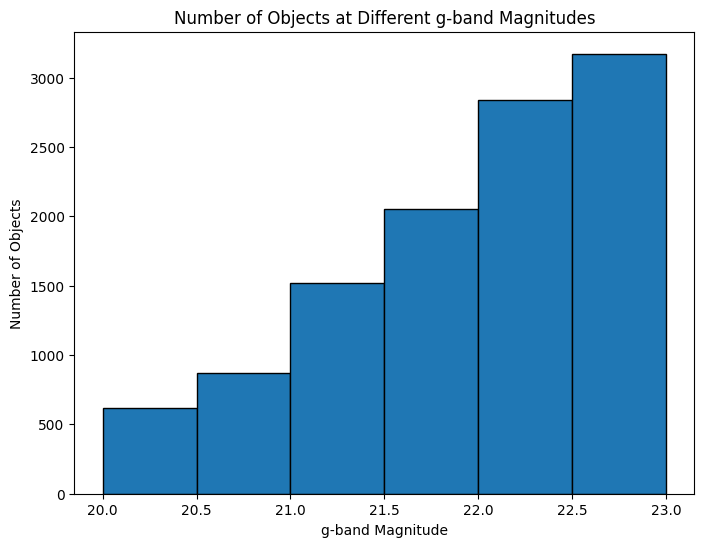

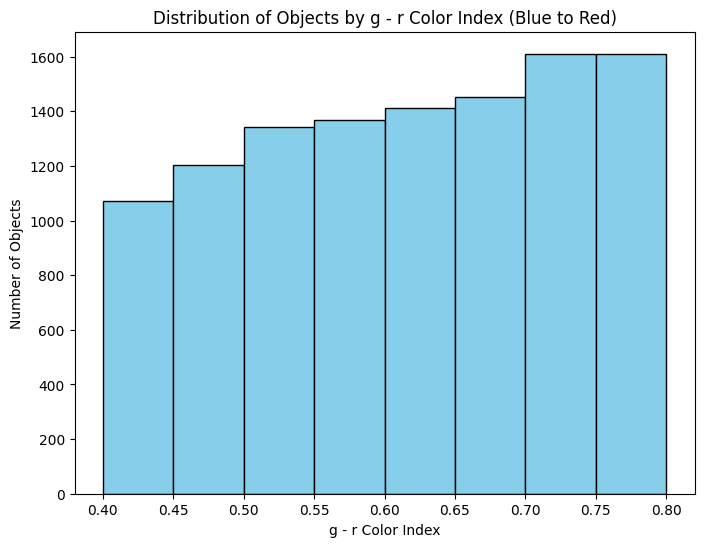

In [ ]:



bins = [20, 20.5, 21, 21.5, 22, 22.5, 23]

plt.figure(figsize=(8, 6))
plt.hist(data['g'], bins=bins, edgecolor='black')
plt.xlabel('g-band Magnitude')
plt.ylabel('Number of Objects')
plt.title('Number of Objects at Different g-band Magnitudes')
plt.show()


color_bins = [0.4, 0.45, 0.5,0.55,0.6,0.65,0.7,0.75,0.8]

plt.figure(figsize=(8, 6))
plt.hist(data['g_r'], bins=color_bins, edgecolor='black', color='skyblue')
plt.xlabel('g - r Color Index')
plt.ylabel('Number of Objects')
plt.title('Distribution of Objects by g - r Color Index (Blue to Red)')
plt.show()
